<a href="https://www.kaggle.com/code/anikalima/k-meanscluster?scriptVersionId=220823143" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [7]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [5]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")

from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
import seaborn as sns; sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input/kmeansimg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kmeansimg/seema/ekushey.JPG
/kaggle/input/kmeansimg/seema/bangladesh_tea_research.jpg
/kaggle/input/kmeansimg/seema/sundarban_1.jpg
/kaggle/input/kmeansimg/seema/ahsanmanjil66.jpg
/kaggle/input/kmeansimg/seema/Lalbag_kella.jpg
/kaggle/input/kmeansimg/seema/Sundarbans.jpg
/kaggle/input/kmeansimg/seema/shapla_bil.jpg
/kaggle/input/kmeansimg/seema/srimangal12.jpg
/kaggle/input/kmeansimg/seema/Paharpue3.jpg
/kaggle/input/kmeansimg/seema/Prymed.jpg
/kaggle/input/kmeansimg/seema/Bangladeshi_Paisha2.jpg
/kaggle/input/kmeansimg/seema/Pakistan_and_Bangladesh__Physical_and_Political___worksheet.jpg
/kaggle/input/kmeansimg/seema/Nakshi_khata.JPG
/kaggle/input/kmeansimg/seema/Ms__Rashida_Sultana.jpg
/kaggle/input/kmeansimg/seema/comilla_rrb_0025.jpg
/kaggle/input/kmeansimg/seema/national__museum.jpg
/kaggle/input/kmeansimg/seema/_golden_map.jpg
/kaggle/input/kmeansimg/seema/Hanging_bridge.jpg
/kaggle/input/kmeansimg/seema/nature.jpg
/kaggle/input/kmeansimg/seema/Biman_Bangladesh_Airl

In [6]:
# Note: this requires the ``pillow`` package to be installed
dog = imread('/kaggle/input/kmeansimg/seema/paharpur2.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(dog);
print(dog.shape)
print(dog.size)

AttributeError: module 'collections' has no attribute 'MutableMapping'

In [8]:
from imageio import imread
import matplotlib.pyplot as plt

dog = imread('/kaggle/input/kmeansimg/seema/paharpur2.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(dog)
print(dog.shape)
print(dog.size)


<ipython-input-8-bd09d0228cf0>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dog = imread('/kaggle/input/kmeansimg/seema/paharpur2.jpg')


AttributeError: module 'collections' has no attribute 'MutableMapping'

In [9]:
pip install --upgrade pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade scikit-image imageio matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 69.1 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 84.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: imageio
    Found existing installation: imageio 2.35.1
    Uninstalling imageio-2.35.1:
      Successfully uninstalled imageio-2.35.1
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you

In [3]:
import collections
if not hasattr(collections, 'MutableMapping'):
    import collections.abc
    collections.MutableMapping = collections.abc.MutableMapping


<ipython-input-4-bd09d0228cf0>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dog = imread('/kaggle/input/kmeansimg/seema/paharpur2.jpg')


(366, 550, 3)
603900


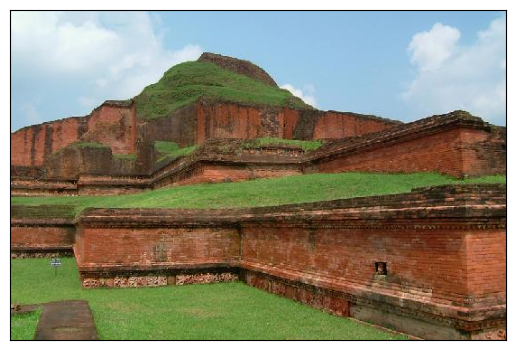

In [4]:
from imageio import imread
import matplotlib.pyplot as plt

dog = imread('/kaggle/input/kmeansimg/seema/paharpur2.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(dog)
print(dog.shape)
print(dog.size)


<ipython-input-5-d98aa3929249>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fox = imread('/kaggle/input/kmeansimg/seema/banbibi_bharani_tiger.jpg')


(922, 1229, 3)
3399414


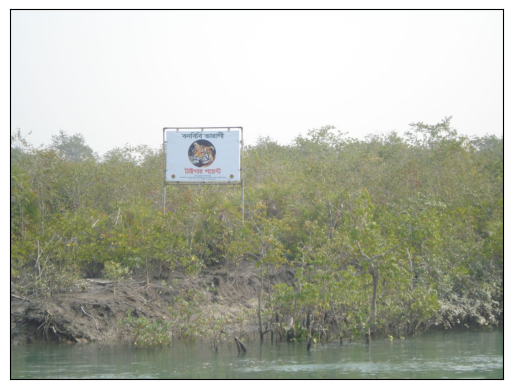

In [5]:
fox = imread('/kaggle/input/kmeansimg/seema/banbibi_bharani_tiger.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(fox);
print(fox.shape)
print(fox.size)

<ipython-input-6-fc38c7af9aff>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  lion = imread('/kaggle/input/kmeansimg/seema/Tiger.jpg')


(768, 1024, 3)
2359296


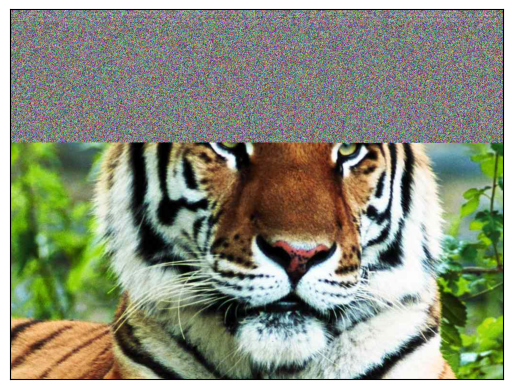

In [6]:
lion = imread('/kaggle/input/kmeansimg/seema/Tiger.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(lion);
print(lion.shape)
print(lion.size)


<ipython-input-7-0f7769e20ac1>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tiger = imread('/kaggle/input/kmeansimg/seema/Parliament_of_Bangladesh__front.jpg')


(671, 1203, 3)
2421639


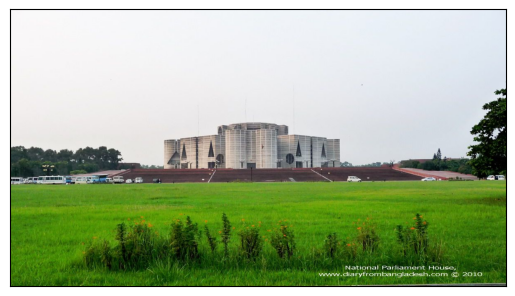

In [7]:

tiger = imread('/kaggle/input/kmeansimg/seema/Parliament_of_Bangladesh__front.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(tiger);
print(tiger.shape)
print(tiger.size)

<ipython-input-8-4536eae8d694>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  wolf = imread('/kaggle/input/kmeansimg/seema/Nakshi_khata.JPG')


(1067, 1600, 3)
5121600


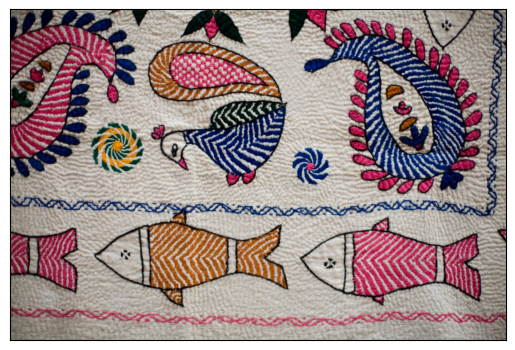

In [8]:
wolf = imread('/kaggle/input/kmeansimg/seema/Nakshi_khata.JPG')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(wolf);
print(wolf.shape)
print(wolf.size)

<ipython-input-9-cc5fd14c07ed>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  panda = imread('/kaggle/input/kmeansimg/seema/New_Year_celebration.jpg')


(1600, 1600, 3)
7680000


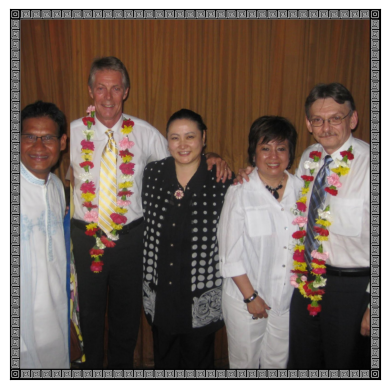

In [9]:
panda = imread('/kaggle/input/kmeansimg/seema/New_Year_celebration.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(panda);
print(panda.shape)
print(panda.size)

In [10]:
print(dog.shape)  # Check the original dimensions


(366, 550, 3)


In [11]:
import cv2

# Resize the image to the target dimensions
dog_resized = cv2.resize(dog, (271, 381))  # (width, height)
doggy = dog_resized.reshape(381 * 271, 3)
print(doggy.shape)  # Should output (103251, 3)


(103251, 3)


In [12]:
foxy = fox / 255.0 # use 0...1 scale
foxy = foxy.reshape(298 * 203, 3)
foxy.shape

ValueError: cannot reshape array of size 3399414 into shape (60494,3)

In [13]:
foxy.shape

(922, 1229, 3)

In [14]:
import cv2

# Resize to (298, 203)
foxy_resized = cv2.resize(fox, (203, 298))  # (width, height) for OpenCV
foxy = foxy_resized / 255.0
foxy = foxy.reshape(298 * 203, 3)
print(foxy.shape)


(60494, 3)


In [15]:
liony.shape


(60500, 3)

In [16]:
import cv2

# Resize the image to (275, 220)
lion_resized = cv2.resize(lion, (220, 275))  # OpenCV uses (width, height)
liony = lion_resized / 255.0
liony = liony.reshape(275 * 220, 3)
print(liony.shape)


(60500, 3)


In [17]:
import cv2

# Resize the image to (286, 304)
tiger_resized = cv2.resize(tiger, (304, 286))  # OpenCV uses (width, height)
tigery = tiger_resized / 255.0
tigery = tigery.reshape(286 * 304, 3)
print(tigery.shape)


(86944, 3)


In [18]:
import cv2

# Resize the image to (328, 302)
wolf_resized = cv2.resize(wolf, (302, 328))  # OpenCV uses (width, height)
wolfy = wolf_resized / 255.0
wolfy = wolfy.reshape(328 * 302, 3)
print(wolfy.shape)


(99056, 3)


In [ ]:
import cv2

# Resize the image to (148, 201)
panda_resized = cv2.resize(panda, (201, 148))  # OpenCV uses (width, height)
panday = panda_resized / 255.0
panday = panday.reshape(148 * 201, 3)
print(panday.shape)


In [ ]:
Vizualize pixels in color space 

visualize pixels in color space

In [ ]:
def plot_pixels(doggy, title, colors=None, N=10000):
    if colors is None:
        colors = doggy
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(doggy.shape[0])[:N]
    colors = colors[i]
    R, G, B = doggy[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [ ]:
plot_pixels(doggy, title='Input color space: 16 million possible colors')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pixels(data, title='', colors=None, N=10000):
    # Ensure data is in the range [0, 1]
    if data.max() > 1.0:
        data = data / 255.0

    # Flatten the data into a list of RGB values
    data = data.reshape(-1, 3)

    # Subsample if data is too large
    if data.shape[0] > N:
        np.random.seed(0)  # For reproducibility
        idx = np.random.choice(data.shape[0], N, replace=False)
        data = data[idx]

    # Prepare colors for scatter plot
    if colors is None:
        colors = data

    # Separate R, G, B channels for scatter plot
    R, G, B = data[:, 0], data[:, 1], data[:, 2]

    # Plot scatter plot
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, c=colors, marker='.', s=1)  # Use `c` for color mapping
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[0].set_title(f"{title} - RGB space")

    ax[1].scatter(R, B, c=colors, marker='.', s=1)
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    ax[1].set_title(f"{title} - Alternate RGB space")

    plt.tight_layout()
    plt.show()


In [ ]:
plot_pixels(doggy, title='Input color space: 16 million possible colors')

In [ ]:
print(doggy.shape)


In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `doggy` is normalized
if doggy.max() > 1.0:
    doggy = doggy / 255.0

# Apply KMeans clustering to reduce color space
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(doggy)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(doggy)]

# Define the plot_pixels function
def plot_pixels(data, title='', colors=None, N=10000):
    # Ensure data is in the range [0, 1]
    if data.max() > 1.0:
        data = data / 255.0

    # Subsample if data is too large
    if data.shape[0] > N:
        np.random.seed(0)  # For reproducibility
        idx = np.random.choice(data.shape[0], N, replace=False)
        data = data[idx]
        colors = colors[idx] if colors is not None else data

    # Prepare colors for scatter plot
    R, G, B = data[:, 0], data[:, 1], data[:, 2]

    # Plot scatter plot
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, c=colors, marker='.', s=1)  # Use `c` for color mapping
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[0].set_title(f"{title} - RGB space")

    ax[1].scatter(R, B, c=colors, marker='.', s=1)
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    ax[1].set_title(f"{title} - Alternate RGB space")

    plt.tight_layout()
    plt.show()

# Plot the reduced color space image
plot_pixels(doggy, colors=new_colors, title="Reduced color space: 16 colors")


In [ ]:
dog_recolored = new_colors.reshape(dog.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(dog)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(dog_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("dog_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `dog` is normalized
if dog.max() > 1.0:
    dog = dog / 255.0

# Reshape `dog` for KMeans
height, width, channels = dog.shape
doggy = dog.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(doggy)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(doggy)]

# Reshape `new_colors` back to the original image dimensions
dog_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(dog)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(dog_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("dog_kmean.png", dpi=125)
plt.show()


In [ ]:
plot_pixels(foxy, title='Input color space: 16 million possible colors')

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(foxy)
new_colors = kmeans.cluster_centers_[kmeans.predict(foxy)]

plot_pixels(foxy, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
fox_recolored = new_colors.reshape(fox.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fox)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fox_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("fox_kmean.png", dpi=125)

In [ ]:
fox_recolored = new_colors.reshape(fox.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fox)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fox_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("fox_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `fox` is normalized
if fox.max() > 1.0:
    fox = fox / 255.0

# Reshape `fox` for KMeans
height, width, channels = fox.shape  # Original image dimensions (922, 1229, 3)
fox_reshaped = fox.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Check the number of pixels matches
assert fox_reshaped.shape[0] == (height * width), "Mismatch in number of pixels!"

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(fox_reshaped)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(fox_reshaped)]

# Reshape `new_colors` back to the original image dimensions
fox_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fox)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fox_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("fox_kmean.png", dpi=125)
plt.show()


In [ ]:
plot_pixels(liony, title='Input color space: 16 million possible colors')

In [ ]:


import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(liony)
new_colors = kmeans.cluster_centers_[kmeans.predict(liony)]

plot_pixels(liony, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
lion_recolored = new_colors.reshape(lion.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(lion)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(lion_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("lion_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `lion` is normalized
if lion.max() > 1.0:
    lion = lion / 255.0

# Reshape `lion` for KMeans
height, width, channels = lion.shape  # Original image dimensions
lion_reshaped = lion.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Check the number of pixels matches
assert lion_reshaped.shape[0] == (height * width), "Mismatch in number of pixels!"

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(lion_reshaped)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(lion_reshaped)]

# Reshape `new_colors` back to the original image dimensions
lion_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(lion)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(lion_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("lion_kmean.png", dpi=125)
plt.show()


In [ ]:
plot_pixels(tigery, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(tigery)
new_colors = kmeans.cluster_centers_[kmeans.predict(tigery)]

plot_pixels(tigery, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
tiger_recolored = new_colors.reshape(tiger.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(tiger)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(tiger_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("tiger_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `tiger` is normalized
if tiger.max() > 1.0:
    tiger = tiger / 255.0

# Reshape `tiger` for KMeans
height, width, channels = tiger.shape  # Original image dimensions
tiger_reshaped = tiger.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Check the number of pixels matches
assert tiger_reshaped.shape[0] == (height * width), "Mismatch in number of pixels!"

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(tiger_reshaped)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(tiger_reshaped)]

# Reshape `new_colors` back to the original image dimensions
tiger_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(tiger)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(tiger_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("tiger_kmean.png", dpi=125)
plt.show()


In [ ]:
plot_pixels(wolfy, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(wolfy)
new_colors = kmeans.cluster_centers_[kmeans.predict(wolfy)]

plot_pixels(wolfy, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
wolf_recolored = new_colors.reshape(wolf.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(wolf)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(wolf_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("wolf_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `wolf` is normalized
if wolf.max() > 1.0:
    wolf = wolf / 255.0

# Reshape `wolf` for KMeans
height, width, channels = wolf.shape  # Original image dimensions (1067, 1600, 3)
wolf_reshaped = wolf.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Check the number of pixels matches
assert wolf_reshaped.shape[0] == (height * width), "Mismatch in number of pixels!"

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(wolf_reshaped)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(wolf_reshaped)]

# Reshape `new_colors` back to the original image dimensions
wolf_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(wolf)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(wolf_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("wolf_kmean.png", dpi=125)
plt.show()


In [ ]:
plot_pixels(panday, title='Input color space: 16 million possible colors')

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(panday)
new_colors = kmeans.cluster_centers_[kmeans.predict(wolfy)]

plot_pixels(panday, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
panda_recolored = new_colors.reshape(panda.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(panda)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(panda_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("panda_kmean.png", dpi=125)

In [ ]:
import warnings
warnings.simplefilter('ignore')  # Suppress warnings

from sklearn.cluster import MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

# Ensure `panda` is normalized
if panda.max() > 1.0:
    panda = panda / 255.0

# Reshape `panda` for KMeans
height, width, channels = panda.shape  # Original image dimensions (1600, 1600, 3)
panda_reshaped = panda.reshape(-1, 3)  # Flatten the image to (n_samples, n_features)

# Check the number of pixels matches
assert panda_reshaped.shape[0] == (height * width), "Mismatch in number of pixels!"

# Apply KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42)
kmeans.fit(panda_reshaped)

# Map each pixel to the nearest cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(panda_reshaped)]

# Reshape `new_colors` back to the original image dimensions
panda_recolored = new_colors.reshape(height, width, channels)

# Plot the original and recolored images
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(panda)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(panda_recolored)
ax[1].set_title('16-color Image', size=16)

# Save the output
plt.savefig("panda_kmean.png", dpi=125)
plt.show()
